In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 12, 6

In [7]:
# lOAD the CSV File into the Memory
df = pd.read_csv('./Data/Crime_Data_2010_2017.csv')


In [9]:
# Select the Columns with Victim's Age, Sex and Descent.
victim = df[['Victim Age', 'Victim Sex', 'Victim Descent']]

In [10]:
victim.isnull().any()


Victim Age        True
Victim Sex        True
Victim Descent    True
dtype: bool

1. Age¶


/Users/kiakarbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


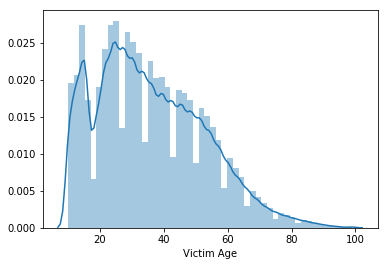

In [11]:
bins = np.arange(victim['Victim Age'].min(), victim['Victim Age'].max(), 10)
# Distplot using Seaborn
sns.distplot(victim['Victim Age'].dropna())

2. Sex
We saw in the last section that the People b/w the age of 20 and 35 years are being target more.

Let's see does the Sex of the Victim Matters.

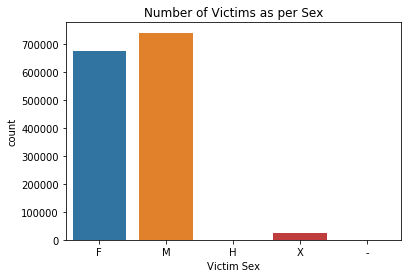

In [12]:
# Seaborns Count Plot
plt.title('Number of Victims as per Sex')
sns.countplot('Victim Sex', data=victim)

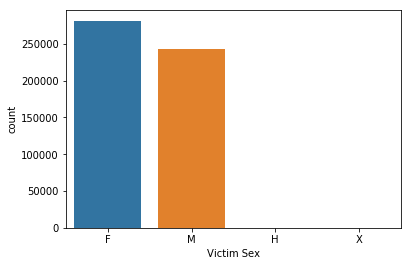

In [13]:
# Number of Victims according to Sex of the Victim b/w the age group 20 and 35 years
sns.countplot('Victim Sex', data=victim[(victim['Victim Age'] >= 20) & (victim['Victim Age'] <= 35)])

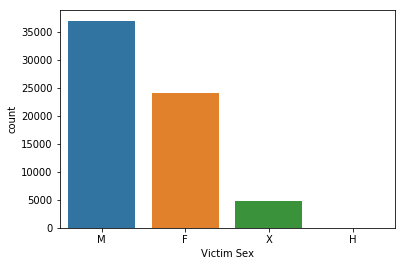

In [14]:
# Number of Victims according to Sex of the Victim b/w the age group 10 and 15 years
sns.countplot('Victim Sex', data=victim[(victim['Victim Age'] >= 10) & (victim['Victim Age'] <= 15)])

3. Descent¶


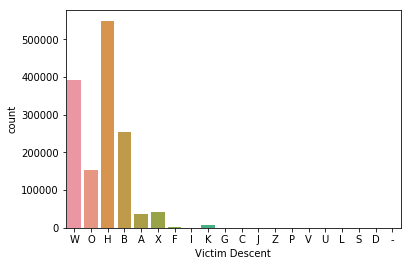

In [15]:
sns.countplot('Victim Descent', data=victim)


In [16]:
area = df[['Area ID', 'Area Name', 'Reporting District']]
area.isnull().any()


Area ID               False
Area Name             False
Reporting District    False
dtype: bool

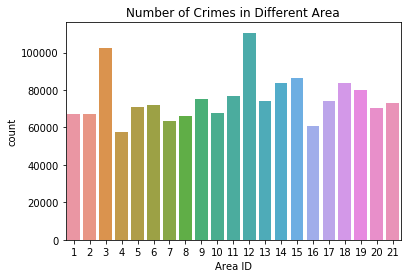

In [17]:
# Which area have more Crime.
plt.title('Number of Crimes in Different Area')
sns.countplot(x='Area ID', data=area)


Top 10 Crimes.
These are overall Top 10 Crimes.

In [19]:
crime = df[['Crime Code', 'Crime Code Description']]
crime.isnull().any()



Crime Code                False
Crime Code Description     True
dtype: bool

In [20]:
crime['Crime Code Description'].value_counts()[:10]


BATTERY - SIMPLE ASSAULT                                        145767
VEHICLE - STOLEN                                                121329
BURGLARY FROM VEHICLE                                           121318
BURGLARY                                                        114751
THEFT PLAIN - PETTY ($950 & UNDER)                              113709
THEFT OF IDENTITY                                               100653
INTIMATE PARTNER - SIMPLE ASSAULT                                85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   67631
Name: Crime Code Description, dtype: int64

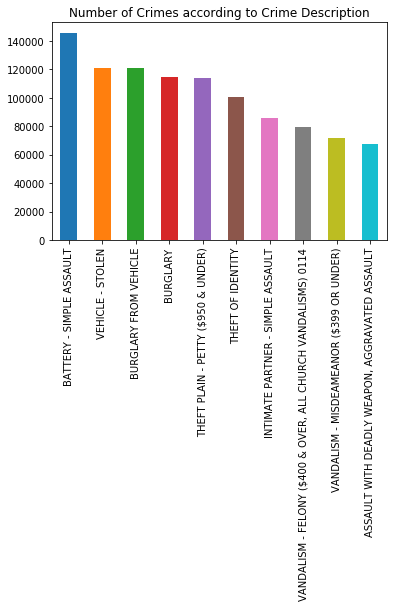

In [21]:
plt.title('Number of Crimes according to Crime Description')
crime['Crime Code Description'].value_counts()[:10].plot(kind='bar')


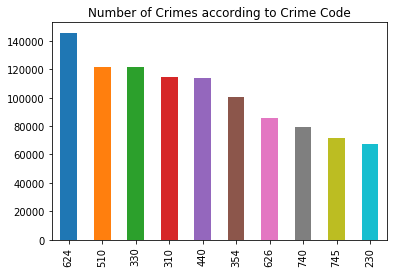

In [22]:
plt.title('Number of Crimes according to Crime Code')
crime['Crime Code'].value_counts()[:10].plot(kind='bar')


Crime and Area


In [24]:
area_crime = pd.concat(objs=[area, crime], axis=1)
print ("Number of Crimes in Area ID 12 i.e 77th Street", len(area_crime[(area_crime['Area ID'] == 12)]))
print ("Number of Crimes in Area ID 3 i.e Southwest", len(area_crime[(area_crime['Area ID'] == 3)]))

Number of Crimes in Area ID 12 i.e 77th Street 110605
Number of Crimes in Area ID 3 i.e Southwest 102259


In [25]:
# Select the Area with the ID 12 and 3 Respectively.
area_crime_12 = area_crime[(area_crime['Area ID'] == 12)]
area_crime_3 = area_crime[(area_crime['Area ID'] == 3)]

Top 10 Crimes in Area ID 12 (77th Street) and 3 (Southwest)

In [26]:
area_crime_12['Crime Code Description'].value_counts()[:10]


BATTERY - SIMPLE ASSAULT                          12208
VEHICLE - STOLEN                                   9831
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     8959
ROBBERY                                            7840
BURGLARY                                           7790
INTIMATE PARTNER - SIMPLE ASSAULT                  7146
BURGLARY FROM VEHICLE                              5866
VANDALISM - MISDEAMEANOR ($399 OR UNDER)           5361
THEFT PLAIN - PETTY ($950 & UNDER)                 5275
THEFT OF IDENTITY                                  5146
Name: Crime Code Description, dtype: int64

In [27]:
area_crime_3['Crime Code Description'].value_counts()[:10]


BATTERY - SIMPLE ASSAULT                          11196
THEFT PLAIN - PETTY ($950 & UNDER)                 9730
VEHICLE - STOLEN                                   7085
BURGLARY                                           6920
BURGLARY FROM VEHICLE                              6026
INTIMATE PARTNER - SIMPLE ASSAULT                  5624
ROBBERY                                            5621
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     5501
THEFT OF IDENTITY                                  5174
VANDALISM - MISDEAMEANOR ($399 OR UNDER)           4825
Name: Crime Code Description, dtype: int64

Both areas have Simple Assault at the TOP.

